In [2]:
## importing libraries
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D




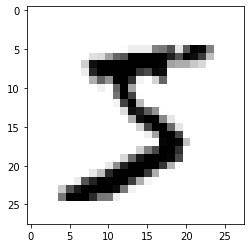

In [3]:
## oading mnist dataset
## converting image to binary (the image is reverted)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()


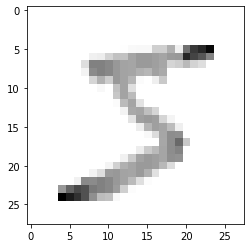

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [4]:
## normalising the dataset ,can be done dividing by 255 but we have a built-in-command for it with axis=1
## the values are between 0 and 1
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()
print(x_train[0])
print(y_train[0])

In [5]:
## resizing the image for convolution,adding one dimension
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)


In [8]:
## neura networks layers are used 
## model is sequential ,convolution,relu and pooling is done thrice
## dense layer at last should be 10 because there are 10 classes
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [9]:
## training the model
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
model.fit(x_trainr,y_train,epochs=10,validation_split=0.3)


Epoch 1/10
1313/1313 [==============================] - 28s 21ms/step - loss: 0.3392 - accuracy: 0.8920 - val_loss: 0.1234 - val_accuracy: 0.9619
Epoch 2/10
1313/1313 [==============================] - 29s 22ms/step - loss: 0.1081 - accuracy: 0.9669 - val_loss: 0.1175 - val_accuracy: 0.9648
Epoch 3/10
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0760 - accuracy: 0.9770 - val_loss: 0.0676 - val_accuracy: 0.9792
Epoch 4/10
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0590 - accuracy: 0.9818 - val_loss: 0.0997 - val_accuracy: 0.9712
Epoch 5/10
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0487 - accuracy: 0.9842 - val_loss: 0.0680 - val_accuracy: 0.9795
Epoch 6/10
1313/1313 [==============================] - 31s 23ms/step - loss: 0.0390 - accuracy: 0.9874 - val_loss: 0.0617 - val_accuracy: 0.9809
Epoch 7/10
1313/1313 [==============================] - 31s 24ms/step - loss: 0.0307 - accuracy: 0.9901 - val_loss: 0.0679 -

In [10]:
## predicting
test_loss,test_acc=model.evaluate(x_testr,y_test)
print(test_loss)
print(test_acc)
predicions=model.predict([x_testr])
print(predicions)



313/313 [==============================] - 2s 6ms/step - loss: 0.0599 - accuracy: 0.9840
0.05988941714167595
0.984000027179718
[[5.1833177e-10 5.7590091e-06 2.0751192e-07 ... 9.9998832e-01
  2.0389339e-07 5.6140617e-08]
 [2.9241494e-07 3.1756556e-10 9.9999964e-01 ... 9.8822417e-10
  1.4950507e-08 2.3042302e-08]
 [2.6263189e-08 9.9999964e-01 5.7106657e-08 ... 1.4950685e-07
  4.4810534e-08 7.0989064e-09]
 ...
 [7.1927079e-16 3.3581738e-11 1.7404272e-11 ... 1.9862039e-09
  2.7238123e-09 3.6262680e-08]
 [8.9749787e-12 5.9961608e-10 8.5018208e-14 ... 4.1169268e-13
  9.9659832e-05 8.1944791e-07]
 [3.9931759e-08 4.8919905e-08 1.5501257e-08 ... 1.4941907e-07
  8.8480050e-07 2.7211118e-07]]


7


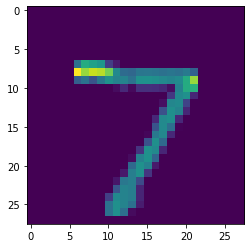

In [11]:
## testing with dataset
print(np.argmax(predicions[0]))
plt.imshow(x_test[0])

6


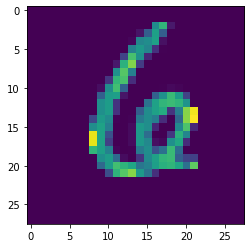

In [12]:
print(np.argmax(predicions[123]))
plt.imshow(x_test[123])

7


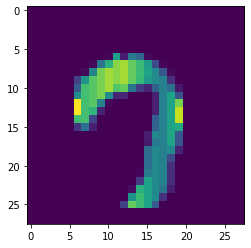

In [13]:
print(np.argmax(predicions[220]))
plt.imshow(x_test[220])

3


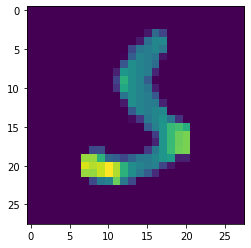

In [14]:
print(np.argmax(predicions[340]))
plt.imshow(x_test[340])

4


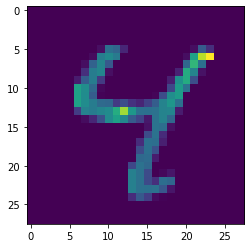

In [15]:
print(np.argmax(predicions[6]))
plt.imshow(x_test[6])

0


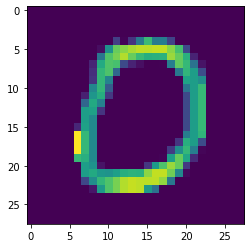

In [16]:
print(np.argmax(predicions[10]))
plt.imshow(x_test[10])

0


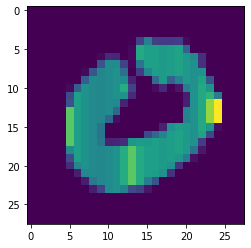

In [18]:
print(np.argmax(predicions[25]))
plt.imshow(x_test[25])

5


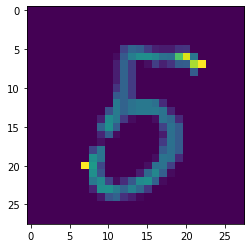

In [19]:
print(np.argmax(predicions[45]))
plt.imshow(x_test[45])

6


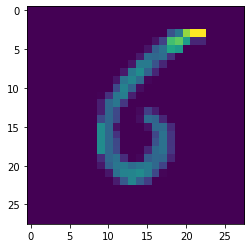

In [20]:
print(np.argmax(predicions[650]))
plt.imshow(x_test[650])

9


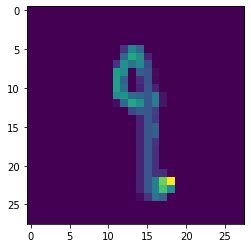

In [21]:
print(np.argmax(predicions[4500]))
plt.imshow(x_test[4500])